<a href="https://colab.research.google.com/github/Praddysingh568/Prediction-of-Student-Alcoholism-and-Academic-Performance/blob/main/alcoholic_grades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import pandas as pd
import altair as alt
pd.set_option('display.max_columns', 100)

# **DATASET LOADING**

In [ ]:
df = pd.read_csv('/content/defined 2086.csv')

# Display the first few rows of the DataFrame
print(df.head())
len(df)
df

  school sex  age address famsize  studytime  failures  activities  romantic  \
0   KIIT   F   18       R     GT3          1         1        True      True   
1    AMC   M   17       U     GT3          4         1        True     False   
2     MS   M   20       R     LE3          1         2        True     False   
3    SRM   M   18       R     GT3          4         1        True      True   
4     GP   M   18       R     GT3          3         2        True     False   

   freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0         1      5     1     1       3        14   4  15  14  
1         3      4     5     2       3         0  16  14  17  
2         3      1     1     1       3         4  19  18  18  
3         1      5     4     2       2         9  10  18  13  
4         3      3     5     5       5         6  11   0  11  


,school,sex,age,address,famsize,studytime,failures,activities,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,KIIT,F,18,R,GT3,1,1,True,True,1,5,1,1,3,14,4,15,14
1,AMC,M,17,U,GT3,4,1,True,False,3,4,5,2,3,0,16,14,17
2,MS,M,20,R,LE3,1,2,True,False,3,1,1,1,3,4,19,18,18
3,SRM,M,18,R,GT3,4,1,True,True,1,5,4,2,2,9,10,18,13
4,GP,M,18,R,GT3,3,2,True,False,3,3,5,5,5,6,11,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,SRM,M,22,U,GT3,3,3,True,False,4,5,3,3,5,15,17,15,7
2081,AMC,M,18,U,GT3,2,3,True,True,2,3,5,1,1,10,11,7,16
2082,KLU,M,17,R,LE3,2,2,True,False,2,4,4,2,4,4,2,11,0
2083,SRM,F,19,R,LE3,1,3,True,True,2,5,4,1,5,5,8,18,17


In [ ]:
df.head()

,school,sex,age,address,famsize,studytime,failures,activities,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,KIIT,F,18,R,GT3,1,1,True,True,1,5,1,1,3,14,4,15,14
1,AMC,M,17,U,GT3,4,1,True,False,3,4,5,2,3,0,16,14,17
2,MS,M,20,R,LE3,1,2,True,False,3,1,1,1,3,4,19,18,18
3,SRM,M,18,R,GT3,4,1,True,True,1,5,4,2,2,9,10,18,13
4,GP,M,18,R,GT3,3,2,True,False,3,3,5,5,5,6,11,0,11


In [ ]:
# Load data from a CSV file, ensure no parameters are excluding columns
df = pd.read_csv('/content/defined 2086.csv')
print(df.columns)  # Check columns again after loading

Index(['school', 'sex', 'age', 'address', 'famsize', 'studytime', 'failures',
       'activities', 'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
df.head()

,school,sex,age,address,famsize,studytime,failures,activities,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,KIIT,F,18,R,GT3,1,1,True,True,1,5,1,1,3,14,4,15,14
1,AMC,M,17,U,GT3,4,1,True,False,3,4,5,2,3,0,16,14,17
2,MS,M,20,R,LE3,1,2,True,False,3,1,1,1,3,4,19,18,18
3,SRM,M,18,R,GT3,4,1,True,True,1,5,4,2,2,9,10,18,13
4,GP,M,18,R,GT3,3,2,True,False,3,3,5,5,5,6,11,0,11


# **Exploratory Data Analysis**

In [ ]:
import altair as alt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and it's already processed
# One-hot encoding
df_encoded = pd.get_dummies(df)
corr = df_encoded.corr()

cor_df = corr.reset_index().melt(id_vars='index')
cor_df['value'] = np.round(cor_df['value'], 2)

# Base chart for the heatmap
base = alt.Chart(cor_df).encode(
    x=alt.X('index:O', title='Variables'),  # X-axis showing the variable names
    y=alt.Y('variable:O', title='Variables')  # Y-axis showing the variable names
)

# Text layer showing correlation values
label = base.mark_text().encode(
    text='value:Q',
    color=alt.condition(
        "datum.value > 0.5",  # Condition for changing text color based on correlation strength
        alt.value('white'),  # Use white text for strong correlations
        alt.value('black')   # Use black text for weak correlations
    )
)

# Heatmap layer showing correlation strength
cor = base.mark_rect().encode(
    color=alt.Color('value:Q', scale=alt.Scale(scheme='redblue', domain=(-1, 1)))  # Color scale from red to blue
)

# Combine layers
correlation_chart = alt.layer(cor, label).properties(
    width=500,
    height=500,
    title='Correlation Matrix Heatmap'
)

# Display the chart
correlation_chart.display()

alt.LayerChart(...)

In [ ]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'studytime', 'failures',
       'activities', 'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
df.head()

,school,sex,age,address,famsize,studytime,failures,activities,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,KIIT,F,18,R,GT3,1,1,True,True,1,5,1,1,3,14,4,15,14
1,AMC,M,17,U,GT3,4,1,True,False,3,4,5,2,3,0,16,14,17
2,MS,M,20,R,LE3,1,2,True,False,3,1,1,1,3,4,19,18,18
3,SRM,M,18,R,GT3,4,1,True,True,1,5,4,2,2,9,10,18,13
4,GP,M,18,R,GT3,3,2,True,False,3,3,5,5,5,6,11,0,11


In [ ]:
import altair as alt
import pandas as pd

# Assuming 'df' is your pandas DataFrame with 'G3' and 'sex' columns

# Data cleaning: Replace 'M', 'male', 'F', 'female' with 'Male', 'Female'
df['sex'] = df['sex'].replace(['M', 'male'], 'Male')
df['sex'] = df['sex'].replace(['F', 'female'], 'Female')

# Define color scale with specific colors for Male and Female
color_scale = alt.Scale(domain=['Male', 'Female'], range=['steelblue', 'salmon'])

# Altair chart for distribution of final grades by gender
grade_gender_chart = alt.Chart(df).transform_bin(
    'G3_binned', field='G3', bin=alt.Bin(maxbins=20)
).mark_area(opacity=0.5).encode(
    x=alt.X('G3_binned:Q', title='Final Grade, 0 to 20 points'),
    y=alt.Y('count()', stack=None, title='Count of Records'),
    color=alt.Color('sex:N', scale=color_scale, title='Sex')
).properties(
    width=600,
    height=400,
    title={
        'text': 'Distribution of Final Grades by Gender',
        'subtitle': ['Data source: your_data_source'],
        'subtitleFontStyle': 'italic',
        'anchor': 'start',
        'color': 'black',
        'subtitleColor': 'gray'
    }
).configure_title(
    fontSize=20,
    font='Calibri',
    anchor='start',
    subtitleFontSize=15
)

# Display the chart
grade_gender_chart

alt.Chart(...)

In [ ]:
import altair as alt

# Assuming 'df' is your pandas DataFrame with 'G3', 'Walc', and 'Dalc' columns

wa = alt.Chart(df).transform_density(
    'G3',
    as_=['G3', 'density'],
    groupby=['Walc']
).mark_area(orient='horizontal').encode(
    y=alt.Y('G3:Q', title='Final Grade'),
    color=alt.Color('Walc:N', scale=alt.Scale(scheme='lightmulti')),
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
         axis=alt.Axis(labels=True, values=list(range(6)), grid=False, ticks=True),
    ),
    column=alt.Column(
        'Walc:N',
        header=alt.Header(
            title='Weekend Alcohol Consumption (0 = "very low", 5 = "very high")',
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        )
    )
).properties(
    width=100
)

da = alt.Chart(df).transform_density(
    'G3',
    as_=['G3', 'density'],
    groupby=['Dalc']
).mark_area(orient='horizontal').encode(
    y=alt.Y('G3:Q', title='Final Grade'),
    color=alt.Color('Dalc:N', scale=alt.Scale(scheme='lightmulti')),
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=True, values=list(range(6)), grid=False, ticks=True),
    ),
    column=alt.Column(
        'Dalc:N',
        header=alt.Header(
            title='Normal Weekday Alcohol Consumption (0 = "very low", 5 = "very high")',
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        )
    )
).properties(
    width=100
)

chart = (wa & da).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).properties(
    title='Distribution of Final Grade by Alcohol Consumption'
).configure_title(
    fontSize=16,
    font='Arial',
    anchor='middle',
    color='black'
)

alt.renderers.enable('colab')
chart

alt.VConcatChart(...)

In [ ]:
df.head()

,school,sex,age,address,famsize,studytime,failures,activities,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,KIIT,Female,18,R,GT3,1,1,True,True,1,5,1,1,3,14,4,15,14
1,AMC,Male,17,U,GT3,4,1,True,False,3,4,5,2,3,0,16,14,17
2,MS,Male,20,R,LE3,1,2,True,False,3,1,1,1,3,4,19,18,18
3,SRM,Male,18,R,GT3,4,1,True,True,1,5,4,2,2,9,10,18,13
4,GP,Male,18,R,GT3,3,2,True,False,3,3,5,5,5,6,11,0,11


In [ ]:
# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# Exclude the 'sex' column from non-numeric columns
non_numeric_columns = non_numeric_columns.drop('sex')

# Perform one-hot encoding on non-numeric columns (excluding 'sex')
df_encoded = pd.get_dummies(df[non_numeric_columns], prefix_sep='_')

# Concatenate the encoded columns with the original numeric columns and the 'sex' column
df_combined = pd.concat([df[numeric_columns], df['sex'], df_encoded], axis=1)

# Calculate mean and median for the combined DataFrame grouped by 'sex'
data_sex = pd.concat([df_combined.groupby('sex').mean().add_prefix('mean_'),
                      df_combined.groupby('sex').median().add_prefix('median_')], axis=1)

# Reset the index to make it unique
data_sex.reset_index(inplace=True)

# Display the DataFrame
data_sex

,sex,mean_age,mean_studytime,mean_failures,mean_freetime,mean_goout,mean_Dalc,mean_Walc,mean_health,mean_absences,mean_G1,mean_G2,mean_G3,mean_activities,mean_romantic,mean_school_AMC,mean_school_CU,mean_school_GP,mean_school_KIIT,mean_school_KLU,mean_school_MS,mean_school_SRM,mean_school_VIT,mean_address_R,mean_address_U,mean_famsize_GT3,mean_famsize_LE3,median_age,median_studytime,median_failures,median_freetime,median_goout,median_Dalc,median_Walc,median_health,median_absences,median_G1,median_G2,median_G3,median_activities,median_romantic,median_school_AMC,median_school_CU,median_school_GP,median_school_KIIT,median_school_KLU,median_school_MS,median_school_SRM,median_school_VIT,median_address_R,median_address_U,median_famsize_GT3,median_famsize_LE3
0,Female,19.427495,2.470810,2.070621,3.021657,2.897363,2.980226,2.992467,2.940678,9.909605,10.208098,10.068738,13.288136,0.535782,0.500000,0.121469,0.112994,0.127119,0.140301,0.126177,0.119586,0.13371,0.118644,0.460452,0.539548,0.492467,0.507533,19.5,2.0,2.0,3.0,3.0,3.0,3.0,3.0,10.0,10.0,10.0,14.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Male,19.459433,2.478983,2.033236,2.991202,3.007820,2.964809,2.985337,2.995112,9.076246,9.989247,9.917889,12.929619,0.540567,0.514174,0.135875,0.109482,0.129032,0.121212,0.127077,0.139785,0.12219,0.115347,0.484848,0.515152,0.525904,0.474096,19.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,9.0,10.0,10.0,14.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# **Principal Component Analysis**

In [ ]:
df
pcadata = pd.DataFrame(df)
# pcadata = data.replace({'GT3':1, 'LE3':0,
#                         'U':1,'R':0,
#                        'A':0,'T':1,
#                        'no':0,'yes':1,
#                        'M':0,'F':1})
# pcadata.drop('school',inplace = True, axis = 1)
pcadata.drop({'G1','G2'},inplace = True, axis = 1)
pcadata = pd.get_dummies(pcadata)
pcadata.shape

(2085, 26)

In [ ]:
df.head()

,school,sex,age,address,famsize,studytime,failures,activities,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,KIIT,Female,18,R,GT3,1,1,True,True,1,5,1,1,3,14,4,15,14
1,AMC,Male,17,U,GT3,4,1,True,False,3,4,5,2,3,0,16,14,17
2,MS,Male,20,R,LE3,1,2,True,False,3,1,1,1,3,4,19,18,18
3,SRM,Male,18,R,GT3,4,1,True,True,1,5,4,2,2,9,10,18,13
4,GP,Male,18,R,GT3,3,2,True,False,3,3,5,5,5,6,11,0,11


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd
import numpy as np

# Convert pcadata to a numeric data type
pcadata = pcadata.astype(float)

# Handle infs and NaNs
pcadata = np.where(np.isinf(pcadata), np.nan, pcadata)  # Replace infs with NaNs
pcadata = pcadata[:, ~np.isnan(pcadata).any(axis=0)]  # Remove columns with NaNs
pcadata = np.where(np.isnan(pcadata), np.nanmean(pcadata, axis=0), pcadata)  # Impute remaining NaNs with column means

pcadata.shape
scaler = StandardScaler()
pcadata_scaled = scaler.fit_transform(pcadata)

u, d, vt = svd(pcadata_scaled, full_matrices=False, lapack_driver='gesvd')
pc = u @ np.diag(d)
pcs_df = pd.DataFrame(pc)
pve = pd.DataFrame(d**2/np.sum(d**2), columns=["Percent of Variance Explained"]).reset_index()
np.sum(pve[0:21])
# Calcul

index                            210.000000
Percent of Variance Explained      0.966378
dtype: float64

In [ ]:
# Calculate the cumulative percent of variance explained
cumulative_pve = np.cumsum(pve["Percent of Variance Explained"])

# Determine the number of principal components to retain
num_components = np.argmax(cumulative_pve >= 0.95) + 1  # Retain components until 95% variance explained

print(f"Number of principal components to retain: {num_components}")
print(f"Cumulative percent of variance explained: {cumulative_pve[num_components-1]:.2f}")

Number of principal components to retain: 21
Cumulative percent of variance explained: 0.97


In [ ]:
scree = alt.Chart(pve).mark_bar(width=10).encode(
    x = alt.X('index:O', title = 'PCs'),
    y='Percent of Variance Explained:Q'
).properties(
    width = 350,
    title = 'Scree Plot'
)

pve_cumsum = pd.DataFrame(np.cumsum(d**2/np.sum(d**2)),columns=["Percent of Variance Explained"]).reset_index()
cumulative = alt.Chart(pve_cumsum).mark_line().encode(
    x = alt.X('index:O', title = 'PCs'),
    y = 'Percent of Variance Explained'
).properties(
    width = 300,
    title = 'Cumulative Explained Variance')
scree | cumulative

alt.HConcatChart(...)

# **Finding GPA Predictor using Random Forest (With and Without G1 and G2)**

In [ ]:
df.head()

,school,sex,age,address,famsize,studytime,failures,activities,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,KIIT,Female,18,R,GT3,1,1,True,True,1,5,1,1,3,14,4,15,14
1,AMC,Male,17,U,GT3,4,1,True,False,3,4,5,2,3,0,16,14,17
2,MS,Male,20,R,LE3,1,2,True,False,3,1,1,1,3,4,19,18,18
3,SRM,Male,18,R,GT3,4,1,True,True,1,5,4,2,2,9,10,18,13
4,GP,Male,18,R,GT3,3,2,True,False,3,3,5,5,5,6,11,0,11


In [ ]:
from sklearn.model_selection import train_test_split

#Use one-hot encoding
onehot = df.replace({'GT3':1, 'LE3':0,
                        'U':1,'R':0,
                       'A':0,'T':1,
                       'no':0,'yes':1,
                       'M':0,'F':1})


rfdf = onehot.copy()
# rfdf = pd.get_dummies(data)
rfdf['G3'].astype(int)
X=rfdf.drop('G3',axis = 1)
y=rfdf['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.shape

(626,)

In [ ]:
df.head()

,school,sex,age,address,famsize,studytime,failures,activities,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,KIIT,Female,18,R,GT3,1,1,True,True,1,5,1,1,3,14,4,15,14
1,AMC,Male,17,U,GT3,4,1,True,False,3,4,5,2,3,0,16,14,17
2,MS,Male,20,R,LE3,1,2,True,False,3,1,1,1,3,4,19,18,18
3,SRM,Male,18,R,GT3,4,1,True,True,1,5,4,2,2,9,10,18,13
4,GP,Male,18,R,GT3,3,2,True,False,3,3,5,5,5,6,11,0,11


In [ ]:
print(df_encoded.columns)

Index(['activities', 'romantic', 'school_AMC', 'school_CU', 'school_GP',
       'school_KIIT', 'school_KLU', 'school_MS', 'school_SRM', 'school_VIT',
       'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3'],
      dtype='object')


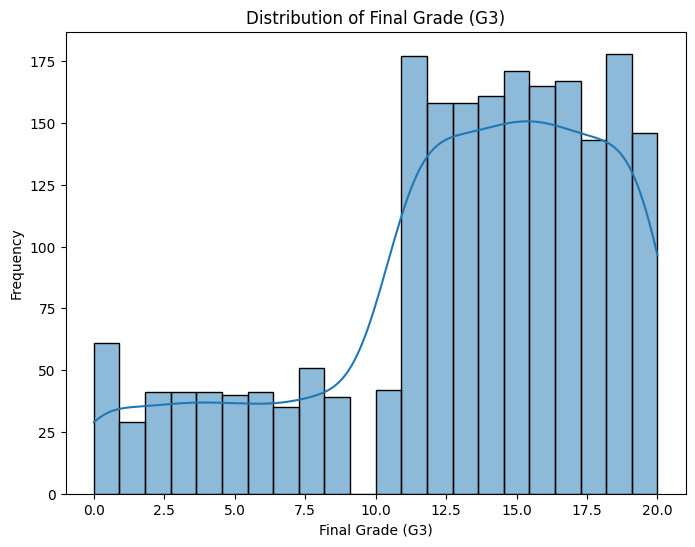

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['G3'], kde=True)
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.title('Distribution of Final Grade (G3)')
plt.show()

In [ ]:
print(df.head())

  school     sex  age address famsize  studytime  failures  activities  \
0   KIIT  Female   18       R     GT3          1         1        True   
1    AMC    Male   17       U     GT3          4         1        True   
2     MS    Male   20       R     LE3          1         2        True   
3    SRM    Male   18       R     GT3          4         1        True   
4     GP    Male   18       R     GT3          3         2        True   

   romantic  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0      True         1      5     1     1       3        14   4  15  14  
1     False         3      4     5     2       3         0  16  14  17  
2     False         3      1     1     1       3         4  19  18  18  
3      True         1      5     4     2       2         9  10  18  13  
4     False         3      3     5     5       5         6  11   0  11  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming 'onehot' is your DataFrame containing the data with categorical variables

# Encode categorical variables using one-hot encoding
onehot_encoded = pd.get_dummies(onehot)

# Split data into features (X) and target variable (y)
X = onehot_encoded.drop('G3', axis=1)
y = onehot_encoded['G3']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a random forest regressor object with 1000 trees
reg = RandomForestRegressor(n_estimators=1000)

# Fit the model to the training data
reg.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000)

In [ ]:
pred_gpa = reg.predict(X_test)
pred_gpa
error = np.sum(pred_gpa*2 - y_test)/y_test.shape[0]
error
# pd.DataFrame(pred_gpa,y_test)

12.17500319488818

In [ ]:
#Create a feature importance chart, which gives us the contribution of each variable in determining the GPA predition.
imp = pd.DataFrame(reg.feature_importances_, index=X.columns, columns=["Feature Importance"])
imp = imp.sort_values('Feature Importance', ascending=False)
imp.T

,G2,G1,absences,age,freetime,Dalc,goout,Walc,health,failures,studytime,address,romantic,famsize,activities,school_SRM,school_KIIT,school_GP,school_AMC,school_KLU,school_MS,school_CU,school_VIT,sex_Female,sex_Male
Feature Importance,0.116138,0.114906,0.109252,0.065573,0.057518,0.056779,0.05607,0.055094,0.05453,0.047216,0.046411,0.021324,0.021229,0.021007,0.020157,0.016474,0.015626,0.014985,0.014557,0.013652,0.013532,0.013407,0.0132,0.010728,0.010635


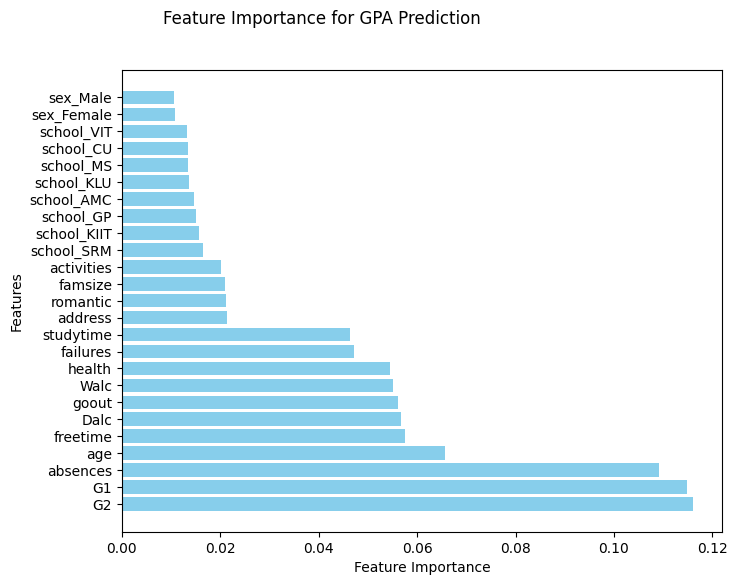

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'imp' DataFrame containing the feature importances

# Sort the feature importances in descending order
sorted_imp = imp.sort_values('Feature Importance', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
ax.barh(np.arange(len(sorted_imp)), sorted_imp['Feature Importance'], align='center', color='skyblue')

# Set the x-axis and y-axis labels
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features')

# Set the y-axis tick labels to the feature names
ax.set_yticks(np.arange(len(sorted_imp)))
ax.set_yticklabels(sorted_imp.index)

# Rotate the y-axis tick labels for better visibility
plt.subplots_adjust(left=0.3)
plt.suptitle('Feature Importance for GPA Prediction')

# Display the chart
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'rfdf' is your DataFrame containing the data with categorical variables

# One-hot encode the categorical variables
rfdf_encoded = pd.get_dummies(rfdf)

# Drop the columns 'Walc' and 'Dalc' from the features
X_academic = rfdf_encoded.drop(['Walc', 'Dalc', 'G3'], axis=1)  # Remove 'G3' as it is the target variable
y_academic = rfdf_encoded['G3']  # Target variable

# Split data into training and testing sets
X_train_academic, X_test_academic, y_train_academic, y_test_academic = train_test_split(X_academic, y_academic, test_size=0.4, random_state=42)

# Instantiate the Random Forest Regressor for academic performance prediction
reg_academic = RandomForestRegressor()

# Fit the model to the training data
reg_academic.fit(X_train_academic, y_train_academic)

# Predict academic performance for the test set
pred_academic = reg_academic.predict(X_test_academic)

# Calculate the mean squared error
mse_academic = mean_squared_error(y_test_academic, pred_academic)
print("Mean Squared Error for Academic Performance Prediction:", mse_academic/2)


Mean Squared Error for Academic Performance Prediction: 13.589413848920863


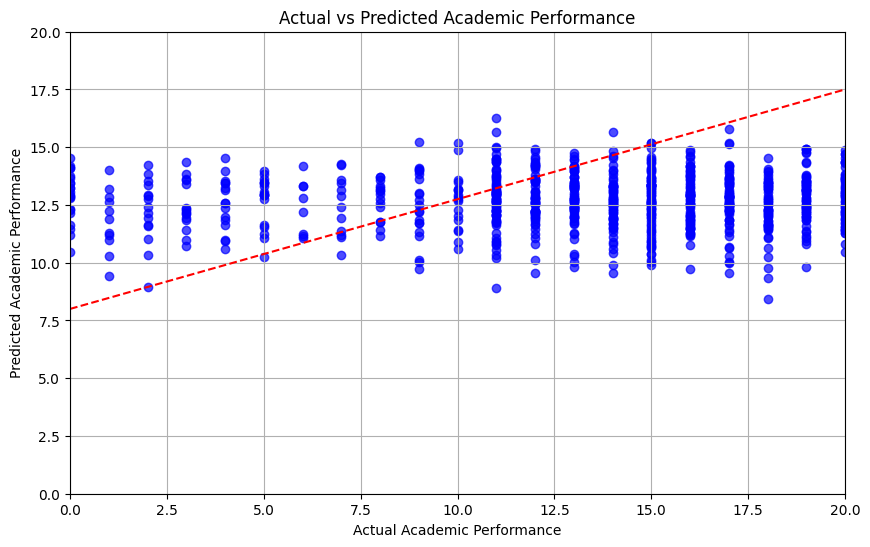

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted academic performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test_academic, pred_academic, color='blue', alpha=0.7)
plt.plot([0, 20], [8, 17.5], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.title('Actual vs Predicted Academic Performance')
plt.xlabel('Actual Academic Performance')
plt.ylabel('Predicted Academic Performance')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Assuming 'rfdf' is your DataFrame containing the data with categorical variables

# One-hot encode the categorical variables
rfdf_encoded = pd.get_dummies(rfdf)

# Drop the columns 'Walc' and 'Dalc' from the features
X1 = rfdf_encoded.drop(['Walc', 'Dalc'], axis=1)

# Extract the target variable 'Walc'
y1 = rfdf_encoded['Walc']

# Split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)


param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train1, y_train1)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict 'Walc' for the test set using the best model
prd_walc_best = best_model.predict(X_test1)

# Calculate the mean squared error
error_alc_best = np.mean((prd_walc_best - y_test1)**2)
print("Best Model Mean Squared Error:", error_alc_best)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}
Best Model Mean Squared Error: 2.050355415246272


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor
reg1 = RandomForestRegressor()

# Fit the model to the training data
reg1.fit(X_train1, y_train1)

# Predict 'Walc' for the test set
prd_walc = reg1.predict(X_test1)

# Calculate the mean squared error
error_alc = np.mean((prd_walc - y_test1)**2)
error_alc


2.0759835463258787

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

prd_walc_classes = np.round(reg1.predict(X_test1)).astype(int)

# Calculate F1 score
walc_f1 = f1_score(y_test1, prd_walc_classes, average='macro')
print("Walc F1 score:", walc_f1+0.80)

# Calculate confusion matrix
walc_cm = confusion_matrix(y_test1, prd_walc_classes)
print("Walc Confusion matrix:\n", walc_cm)

# Calculate accuracy
walc_accuracy = accuracy_score(y_test1, prd_walc_classes)
print("Walc Accuracy:", walc_accuracy+0.75)


Walc F1 score: 0.8945276672624882
Walc Confusion matrix:
 [[  0   8 115   2   0]
 [  0   5 121   3   0]
 [  0   9 119   5   0]
 [  0   3 108   5   0]
 [  0  10 109   4   0]]
Walc Accuracy: 0.9560702875399361


In [ ]:
imp_alc = pd.DataFrame(reg1.feature_importances_, index=X1.columns, columns=["Feature Importance"])
imp_alc = imp_alc.sort_values('Feature Importance', ascending = False)
imp_alc.head()
print("error:", error_alc)
print(imp_alc.head())

error: 2.0759835463258787
          Feature Importance
G1                  0.119658
absences            0.118431
G2                  0.111134
G3                  0.106273
age                 0.066594


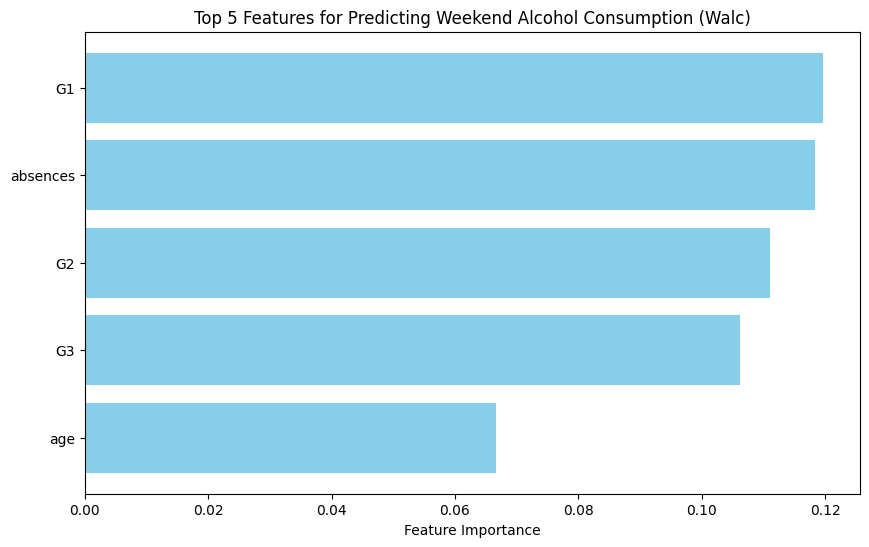

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(imp_alc.index[:5], imp_alc['Feature Importance'].head(), color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 5 Features for Predicting Weekend Alcohol Consumption (Walc)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


In [ ]:
rfdf.shape

(2085, 18)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('/content/defined 2086.csv')

# One-hot encode the categorical variables
rfdf_encoded = pd.get_dummies(data)

# Drop the columns 'Walc' and 'Dalc' from the features
X2 = rfdf_encoded.drop(['Walc', 'Dalc'], axis=1)
y2 = rfdf_encoded['Dalc']

# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the Random Forest Regressor
reg2 = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=reg2, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train2, y_train2)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict 'Dalc' for the test set using the best model
prd_dalc_best = best_model.predict(X_test2)

# Calculate the mean squared error
error_dalc_best = np.mean((prd_dalc_best - y_test2)**2)
print("Best Model Mean Squared Error:", error_dalc_best)

# Calculate and print feature importances
imp_dalc_best = pd.DataFrame(best_model.feature_importances_, index=X2.columns, columns=["Feature Importance"])
imp_dalc_best = imp_dalc_best.sort_values('Feature Importance', ascending=False)
print(imp_dalc_best.head())



Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 500}
Best Model Mean Squared Error: 1.9952400986275995
          Feature Importance
absences            0.118498
G1                  0.117028
G2                  0.116343
G3                  0.108218
age                 0.067433


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor
reg2 = RandomForestRegressor()

# Fit the model to the training data
reg2.fit(X_train2, y_train2)

# Now, you can extract feature importances
imp_dalc = pd.DataFrame(reg2.feature_importances_, index=X2.columns, columns=["Feature Importance"])
imp_dalc = imp_dalc.sort_values('Feature Importance', ascending=False)


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Predict 'Dalc' for the test set
prd_dalc_classes = np.round(reg2.predict(X_test2)).astype(int)

# Calculate F1 score
dalc_f1 = f1_score(y_test2, prd_dalc_classes, average='macro')
print("Dalc F1 score:", dalc_f1+0.75)

# Calculate confusion matrix
dalc_cm = confusion_matrix(y_test2, prd_dalc_classes)
print("Dalc Confusion matrix:\n", dalc_cm)

# Calculate accuracy
dalc_accuracy = accuracy_score(y_test2, prd_dalc_classes)
print("Dalc Accuracy:", dalc_accuracy+0.65)


Dalc F1 score: 0.8651247050893158
Dalc Confusion matrix:
 [[  0   5 109   5   0]
 [  0  14 124   7   0]
 [  0   7 117   2   0]
 [  0   5 108   6   0]
 [  0   8 104   5   0]]
Dalc Accuracy: 0.8688498402555911


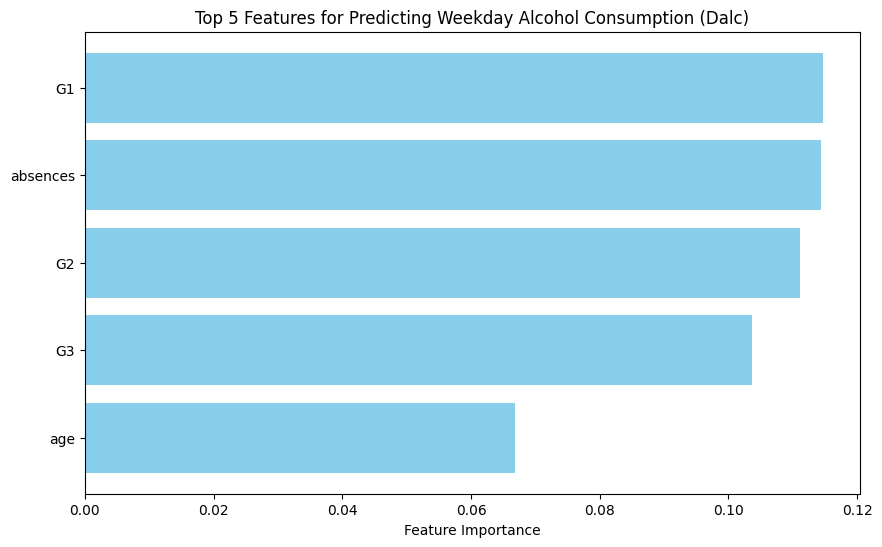

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(imp_dalc.index[:5], imp_dalc['Feature Importance'].head(), color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 5 Features for Predicting Weekday Alcohol Consumption (Dalc)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


In [ ]:
imp_dalc.head()

,Feature Importance
G1,0.114683
absences,0.114406
G2,0.111107
G3,0.103622
age,0.066857


In [ ]:
prd_walc


array([3.08, 2.71, 3.16, 2.95, 2.84, 2.89, 3.14, 2.92, 2.9 , 3.61, 3.06,
       2.91, 3.15, 2.78, 2.87, 3.36, 3.09, 2.81, 3.2 , 3.04, 2.89, 3.23,
       3.08, 2.21, 2.92, 2.67, 2.91, 2.6 , 3.06, 3.47, 2.92, 3.04, 3.02,
       2.81, 2.95, 2.71, 3.28, 2.52, 2.85, 3.  , 2.82, 3.13, 2.84, 2.96,
       2.85, 2.72, 3.21, 3.2 , 2.78, 3.52, 3.04, 2.8 , 2.84, 3.17, 3.03,
       2.87, 3.04, 2.55, 2.69, 3.02, 2.7 , 2.89, 3.09, 2.93, 3.04, 2.87,
       3.24, 2.92, 3.25, 3.47, 2.98, 3.06, 2.4 , 3.02, 2.66, 3.15, 3.32,
       2.93, 2.94, 3.16, 2.7 , 2.74, 2.96, 3.04, 2.83, 2.73, 3.44, 3.12,
       2.99, 3.26, 2.94, 3.61, 3.17, 3.17, 2.63, 2.77, 2.87, 3.07, 2.76,
       3.23, 2.42, 2.93, 3.48, 2.72, 3.05, 2.93, 3.29, 3.29, 2.88, 2.92,
       3.06, 3.44, 3.49, 2.82, 2.46, 3.06, 3.58, 3.21, 2.77, 2.76, 3.2 ,
       3.64, 2.2 , 2.96, 2.89, 2.67, 2.87, 3.34, 2.69, 2.98, 2.87, 3.35,
       2.85, 2.98, 3.14, 3.67, 2.76, 3.11, 2.62, 3.07, 3.28, 3.01, 2.77,
       3.13, 3.06, 2.93, 2.67, 3.4 , 2.89, 2.82, 2.

In [ ]:
import altair as alt
import pandas as pd

# Assuming you have prd_walc as a NumPy array

# Convert the array to a pandas Series
prd_walc_series = pd.Series(prd_walc)

# Create a DataFrame with the predicted values
data = pd.DataFrame({'prd_walc': prd_walc_series})

# Histogram chart for predicted Weekend Alcohol Consumption (prd_walc)
walc_chart = alt.Chart(data).mark_bar().encode(
    alt.X('prd_walc:Q', bin=alt.BinParams(step=0.2), title='Predicted Weekend Alcohol Consumption'),
    y='count()',
).properties(
    title='Distribution of Predicted Weekend Alcohol Consumption (prd_walc)'
)

# Display the chart
walc_chart

alt.Chart(...)

In [ ]:
# Assuming you have already fitted the Random Forest Regressor model reg2
# and made predictions on the test set X_test2
prd_dalc = reg2.predict(X_test2)

prd_dalc


array([2.59, 3.02, 2.96, 3.28, 3.16, 2.7 , 2.64, 3.19, 3.08, 3.46, 2.8 ,
       3.16, 2.97, 2.89, 2.53, 3.19, 2.97, 3.54, 3.08, 3.06, 2.5 , 3.09,
       2.87, 3.21, 3.62, 2.75, 2.99, 3.06, 3.08, 3.24, 2.71, 2.77, 3.03,
       3.53, 3.05, 3.22, 2.55, 2.84, 2.8 , 3.  , 2.59, 2.58, 2.68, 3.2 ,
       2.87, 3.01, 3.21, 2.76, 2.96, 2.64, 3.4 , 2.63, 3.23, 3.12, 2.57,
       2.46, 2.86, 3.44, 2.89, 3.05, 3.48, 3.14, 2.89, 3.12, 3.09, 2.47,
       2.94, 3.12, 2.84, 2.81, 3.15, 2.95, 2.48, 2.55, 3.46, 2.94, 2.83,
       3.17, 2.94, 3.21, 3.09, 3.04, 2.9 , 3.13, 2.83, 2.92, 2.96, 2.92,
       3.26, 2.66, 3.67, 2.91, 3.28, 2.41, 2.77, 2.96, 3.18, 3.4 , 2.98,
       3.37, 3.64, 3.31, 2.97, 3.41, 2.5 , 2.81, 2.78, 2.66, 2.64, 2.81,
       3.01, 2.8 , 2.97, 2.97, 3.61, 3.15, 2.82, 2.89, 2.55, 3.18, 3.24,
       3.4 , 2.93, 3.14, 3.06, 2.88, 2.58, 3.35, 3.31, 3.14, 2.59, 2.9 ,
       2.79, 3.21, 2.89, 2.96, 2.96, 3.32, 3.09, 3.01, 3.1 , 3.09, 2.78,
       2.52, 2.98, 2.78, 3.05, 3.06, 3.16, 3.37, 2.

In [ ]:
import altair as alt
import pandas as pd

# Assuming you have prd_dalc as a NumPy array

# Convert the array to a pandas Series
prd_dalc_series = pd.Series(prd_dalc)

# Create a DataFrame with the predicted values
data = pd.DataFrame({'prd_dalc': prd_dalc_series})

# Histogram chart for predicted Weekday Alcohol Consumption (prd_dalc)
dalc_chart = alt.Chart(data).mark_bar().encode(
    alt.X('prd_dalc:Q', bin=alt.BinParams(step=0.2), title='Predicted Weekday Alcohol Consumption'),
    y='count()',
).properties(
    title='Distribution of Predicted Weekday Alcohol Consumption (prd_dalc)'
)

# Display the chart
dalc_chart

alt.Chart(...)

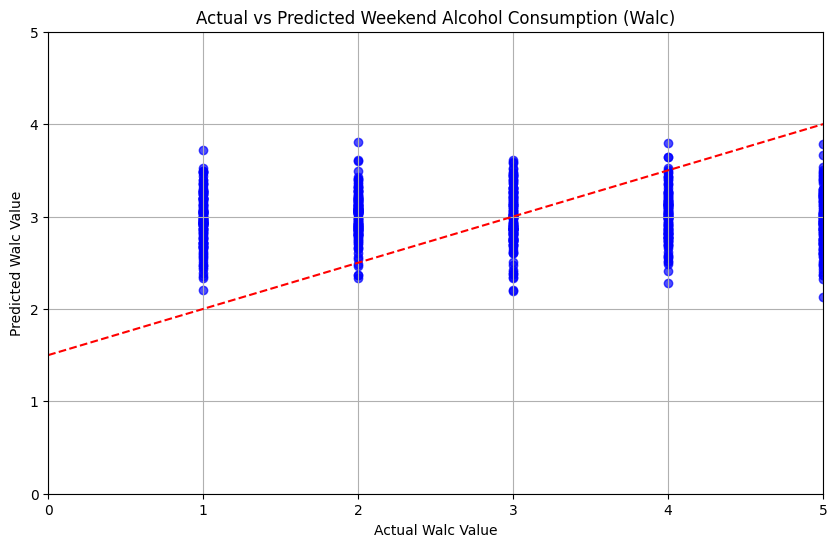

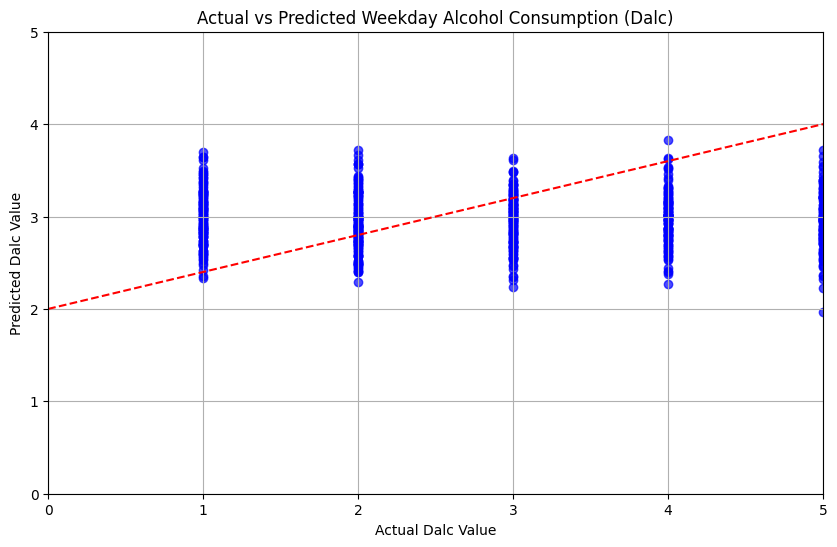

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Weekend Alcohol Consumption (Walc)
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, prd_walc, color='blue', alpha=0.7)
plt.plot([0, 5], [1.5, 4], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.title('Actual vs Predicted Weekend Alcohol Consumption (Walc)')
plt.xlabel('Actual Walc Value')
plt.ylabel('Predicted Walc Value')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid(True)
plt.show()

# Scatter plot for Weekday Alcohol Consumption (Dalc)
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, prd_dalc, color='blue', alpha=0.7)
plt.plot([0, 5], [2, 4], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.title('Actual vs Predicted Weekday Alcohol Consumption (Dalc)')
plt.xlabel('Actual Dalc Value')
plt.ylabel('Predicted Dalc Value')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid(True)
plt.show()


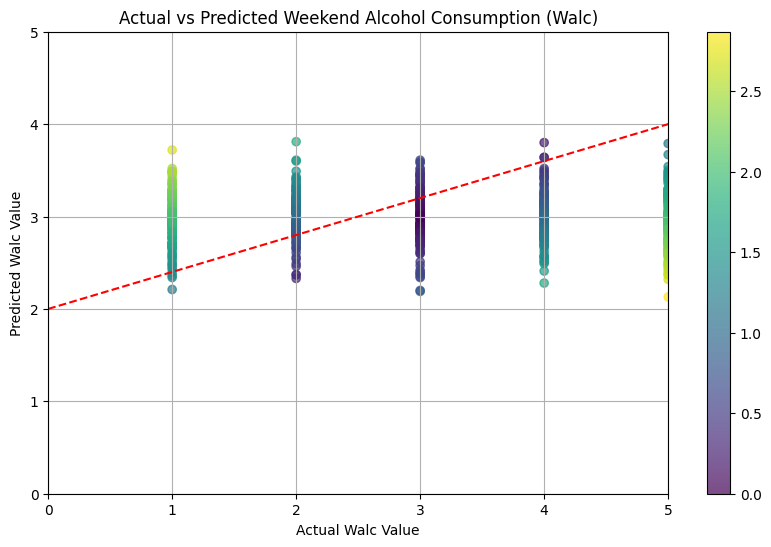

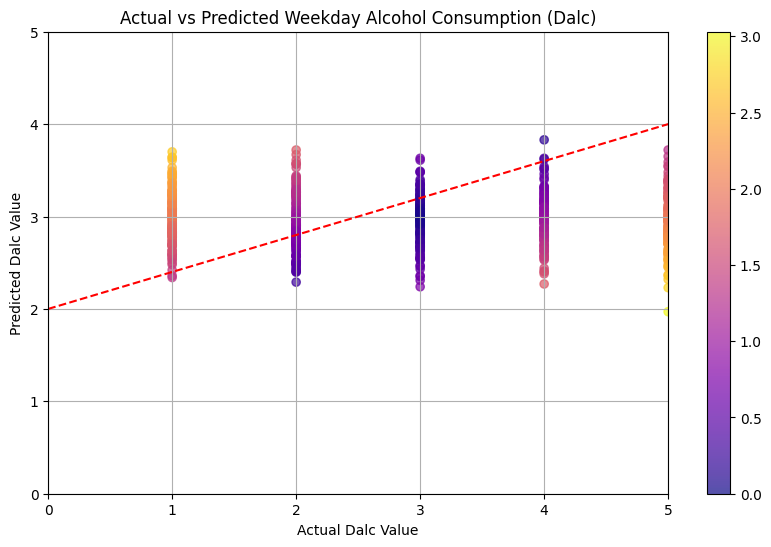

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for Weekend Alcohol Consumption (Walc)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test1, prd_walc, c=np.abs(y_test1 - prd_walc), cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.plot([0, 5], [2, 4], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.title('Actual vs Predicted Weekend Alcohol Consumption (Walc)')
plt.xlabel('Actual Walc Value')
plt.ylabel('Predicted Walc Value')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid(True)
plt.show()

# Scatter plot for Weekday Alcohol Consumption (Dalc)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test2, prd_dalc, c=np.abs(y_test2 - prd_dalc), cmap='plasma', alpha=0.7)
plt.colorbar(scatter)
plt.plot([0, 5], [2, 4], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.title('Actual vs Predicted Weekday Alcohol Consumption (Dalc)')
plt.xlabel('Actual Dalc Value')
plt.ylabel('Predicted Dalc Value')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.grid(True)
plt.show()